In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(30,13)})
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import datetime 
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <img src="https://www.xm.com/wp-content/uploads/2020/07/Stock-Charts-1-3.jpg" />
 </center>   

# Research question 

 **What are the impacts of COVID-19 on Stock Market and What will be the price movements in the future?**

# Motivation



2019-nCoV or Coronavirus was first seen on December 2019 in China. It did not cause panic at first, but dispersion got faster and faster all around the globe. World Health Organization named the coronavirus as Covi-19 on February 11 and declared global **pandemic** on March 11. Confirmed cases are over 20 million over the world.

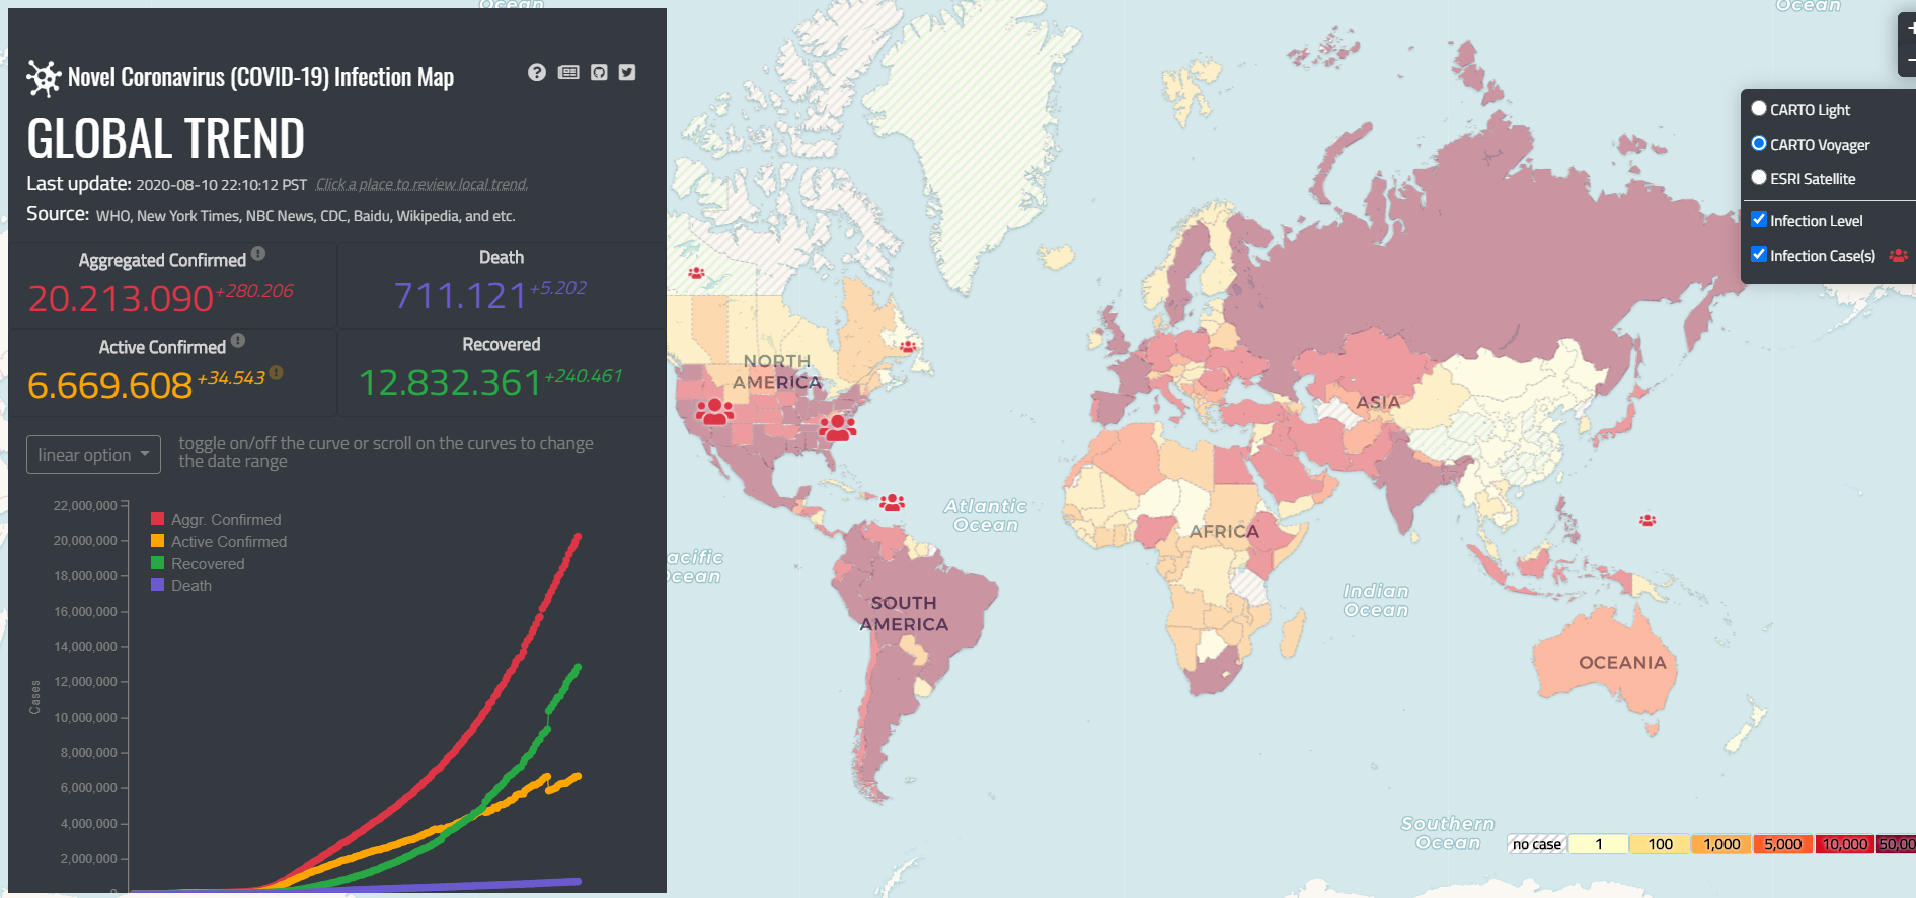

<center>
Source : https://hgis.uw.edu/virus/ (University of Washington)
</center>




**After the start of the pandemic, world economy started to suffer one of the worst economic crisis in the history. Stock market was hit hard when pandemic spread to Europe, then America continent. Stock market declined by 30 percent in overall by March.This is the sharpest decrease since the 2008 Mortgage Crisis. According to some economists, these reactions are evidence that stock markets are not fully efficient wheras other economists stated the difficulty of assessing the flow of information about pandemic and economic consequences. Raised concerns popped up the questions : How will stock markets recover? and What will be the movements of stock prices?**

# Method and data 

##  Method

Method of the project consists of 2 parts ;
1. Stock Market Analysis during Covid-19 Period
2. Stock Price Behavior Prediction using Recurrent Neural Network-LSTM

* In the first part, stock market analysis is done. While doing the analysis, we will look at change in price, daily return on stock average, moving average, checking risk on investing and corroletion of stocks. A lot of visualizations and calculations are used in this section.
* In the second part, Long short-term Memory (RNN architecture) is used to predict the closing stock prices of a particular stock.

## Data

2 different data sources are used. They are **Yahoo Finance** dataset and **Our World in Data**. Pandas datareader package is used to get companies' data from Yahoo Finance. On the other hand, Covid-19 data is downloaded from https://ourworldindata.org/coronavirus.

Companies are selected from Standart&Poor's 500 Index. It is a market-capitalization-weighted index of 505 large-cap U.S. stocks. The index accounts for 80% of the market value of the U.S. equities market. Because it reflects nearly all of the largest stocks in the U.S., it is often reagrdes as synonymous with the market as a whole. It is as close as there is to a 'default' U.S. stock index. Because of the fact that it is weighted by market cap, the largest stocks have a big impact on both the long-term performance and daily movement of the index. The 10 biggest stocks make up more than quarter of the index's market value. For analysis, 5 biggest companies are selected.

* ### Companies' Stock Data

In [ ]:
tech_list = ['MSFT', 'AAPL', 'AMZN', 'FB','GOOGL']

for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start="2020-03-11", end=datetime.now())
    #start of the datetime is the announcement of Global Pandemic by World Health Organization

In [ ]:
company_list = [MSFT, AAPL, AMZN, FB,GOOGL]
company_name = ["Microsoft", "Apple", "Amazon", "Facebook","Alphabet Inc"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-03-11,157.699997,151.149994,157.130005,153.630005,56371600.0,153.203323,Microsoft
2020-03-12,153.470001,138.580002,145.300003,139.059998,93226400.0,138.673782,Microsoft
2020-03-13,161.910004,140.729996,147.500000,158.830002,92727400.0,158.388870,Microsoft
2020-03-16,149.350006,135.000000,140.000000,135.419998,87905900.0,135.043884,Microsoft
2020-03-17,147.500000,135.000000,140.000000,146.570007,81059800.0,146.162933,Microsoft


* ### S&P 500 Data

In [ ]:
gpc = DataReader("^GSPC", data_source="yahoo",start="2020-03-11",end=datetime.now())
gpc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-11,2825.600098,2707.219971,2825.600098,2741.379883,7374110000,2741.379883
2020-03-12,2660.949951,2478.860107,2630.860107,2480.639893,8829380000,2480.639893
2020-03-13,2711.330078,2492.370117,2569.989990,2711.020020,8258670000,2711.020020
2020-03-16,2562.979980,2380.939941,2508.590088,2386.129883,7781540000,2386.129883
2020-03-17,2553.929932,2367.040039,2425.659912,2529.189941,8358500000,2529.189941


* ### Covid-19 Data

In [ ]:
data = pd.read_csv(r'total_cases.csv',index_col=False,squeeze=True)
data['date'] = pd.to_datetime(data['date'],format='%Y/%m/%d')
data.index = data["date"]
data.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-01,2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02,2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-04,2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


* ### Descriptive Statistics of Data

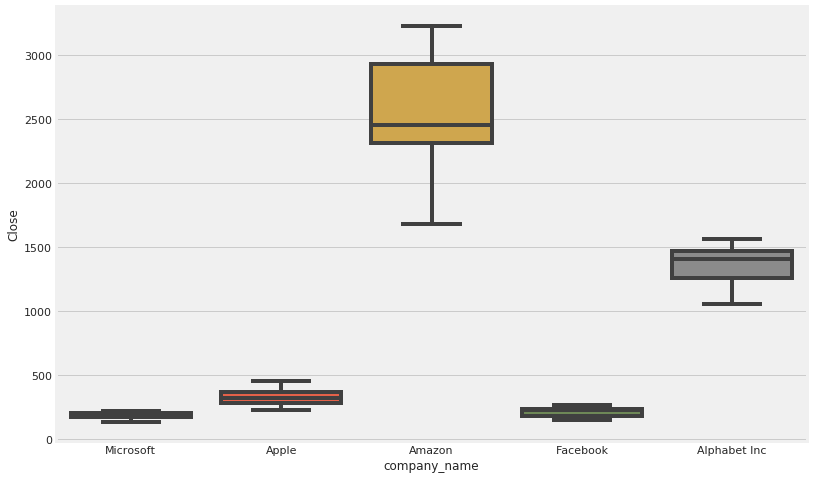

In [ ]:
fig1 = plt.gcf()
fig1.set_size_inches(12, 8)
sns.boxplot(x='company_name', y='Close', data=df, orient="v")

In [ ]:
df.groupby("company_name").describe()

High                                                     \
              count         mean         std          min          25%   
company_name                                                             
Alphabet Inc  107.0  1378.426449  137.431577  1066.910034  1276.284973   
Amazon        107.0  2552.552243  433.898254  1759.449951  2354.224976   
Apple         107.0   329.530374   56.670063   228.500000   282.380005   
Facebook      107.0   214.467057   33.450499   148.179993   180.389999   
Microsoft     107.0   186.618411   20.219605   140.570007   174.279999   

                                                       Low               ...  \
                      50%          75%          max  count         mean  ...   
company_name                                                             ...   
Alphabet Inc  1424.000000  1489.260010  1587.050049  107.0  1339.191215  ...   
Amazon        2475.000000  2989.780029  3344.290039  107.0  2473.769532  ...   
Apple          321.149994   372.130005   457.649994  107.0   320.160934  ...   
Facebook       231.339996   240.364998   278.890015  107.0   206.916062  ...   
Microsoft      186.199997   204.430000   217.639999  107.0   181.003365  ...   

                  Volume              Adj Close                           \
                     75%          max     count         mean         std   
company_name                                                               
Alphabet Inc   2670300.0    5417900.0     107.0  1360.715848  141.988280   
Amazon         6376050.0   12038200.0     107.0  2517.153786  427.739049   
Apple         49727400.0  104618500.0     107.0   324.378710   57.352108   
Facebook      30428000.0   76343900.0     107.0   211.080536   33.574753   
Microsoft     51359200.0   93226400.0     107.0   183.782375   21.396003   

                                                                               
                      min          25%          50%          75%          max  
company_name                                                                   
Alphabet Inc  1054.130005  1257.920044  1409.160034  1471.615051  1564.849976  
Amazon        1676.609985  2315.035034  2449.330078  2926.135010  3225.000000  
Apple          223.361542   277.024261   317.677216   367.831787   454.790009  
Facebook       146.009995   178.205002   225.460007   236.334999   268.440002  
Microsoft      135.043884   172.220360   183.509995   202.709999   216.539993  

[5 rows x 48 columns]

In [ ]:
# Covid 19
data.describe()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
count,2.190000e+02,209.000000,150.000000,214.00000,145.000000,137.000000,132.000000,139.000000,152.000000,210.000000,...,134.000000,144.000000,143.000000,144.000000,143.000000,215.000000,102.000000,118.000000,140.000000,138.000000
mean,4.409665e+06,10673.004785,1596.893333,6656.82243,702.365517,226.744526,2.946970,37.582734,38495.723684,9212.828571,...,115.507463,725.590278,6174.244755,9.986111,3906.195804,210.395349,251.137255,686.059322,1272.171429,569.963768
std,5.275054e+06,14017.170198,1537.462134,8531.79557,243.640355,314.398680,0.224948,26.535429,54107.511038,12918.891353,...,110.147662,306.708317,6970.499453,3.334470,5426.742816,163.797450,321.887965,643.636972,1547.437752,932.634417
min,2.700000e+01,0.000000,2.000000,0.00000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,17.000000,6.000000,6.000000,1.000000,10.000000,0.000000,6.000000,1.000000,2.000000,1.000000
25%,7.907550e+04,0.000000,479.750000,0.00000,704.000000,25.000000,3.000000,24.000000,2254.750000,0.000000,...,56.000000,525.250000,1611.000000,8.000000,241.500000,16.000000,6.000000,34.000000,71.750000,29.000000
50%,2.211023e+06,1176.000000,975.000000,2673.50000,763.000000,73.000000,3.000000,25.000000,9594.000000,1498.000000,...,69.000000,778.000000,3261.000000,12.000000,1121.000000,268.000000,23.000000,479.500000,988.500000,140.500000
75%,7.390901e+06,24102.000000,2384.000000,10670.75000,855.000000,291.000000,3.000000,66.000000,57731.000000,16501.250000,...,96.500000,933.000000,8462.500000,12.000000,5681.000000,332.500000,519.000000,1283.750000,1603.500000,601.500000
max,1.851958e+07,36829.000000,5750.000000,32504.00000,939.000000,1164.000000,3.000000,92.000000,206730.000000,39298.000000,...,463.000000,1300.000000,27314.000000,12.000000,21438.000000,672.000000,766.000000,1760.000000,6580.000000,4221.000000


# Preview of the answers 

It seems like Covid-19 have not hit hard the stock markets yet. This can be because of the deep recession in economies have not met yet. However, daily big jumps can be seen from the data of the top 5 S&P 500 companies. Also, a clear fall in volume of the company stocks can be seen from the results because of the timidity of investors. Moreover, LSTM model suggests the continuation of flactuative Stock price increase for the next 30 days but it is easly changeable due to changing conditions of global pandemic and reaction of countries economies to it.

# Stock Market Analysis

**Before the start, figures below give a prior knowledge about the situation. As it can be seen, Covid-19 Confirmed Cases has a sharp increase globally. On the other hand, S&P 500 Index Volume faces with a sharp decrease after the declaration of global pandemic.**

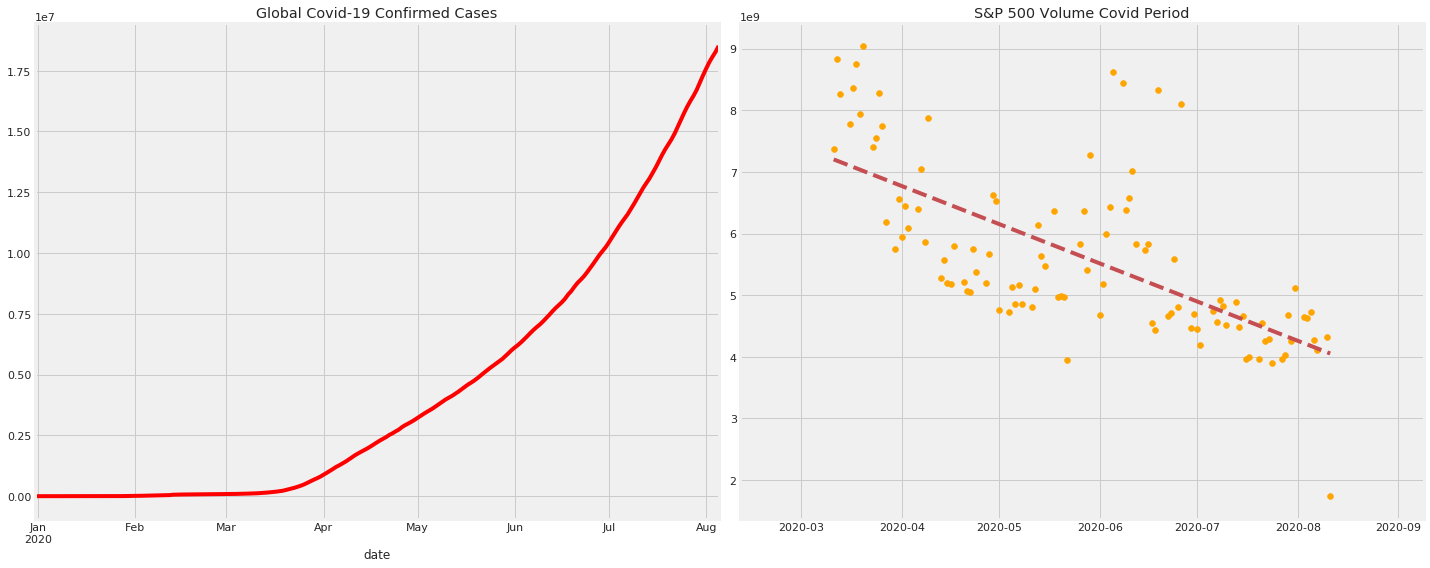

In [ ]:
x=gpc.index.map(datetime.date.toordinal)

figure, axes = plt.subplots(figsize=(20, 8),nrows=1, ncols=2)

data["World"].plot(ax=axes[0],color="red",title="Global Covid-19 Confirmed Cases")
y=gpc["Volume"]
axes[1].scatter(x=gpc.index,y=gpc['Volume'],color="orange")
plt.title('S&P 500 Volume Covid Period')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axes[1].plot(x,p(x),"r--")

figure.tight_layout()

<center>
    <h2>
  Change In Price Of The Stock Over Time
    </h2>
    </center>

**The graph below shows the Close Price of the Stocks daily after the declaration of Covid-19 as a global pandemic. All companies had increase in the closing price of the stock traded. However, Amazon was able to survive in a better shape than other companies**

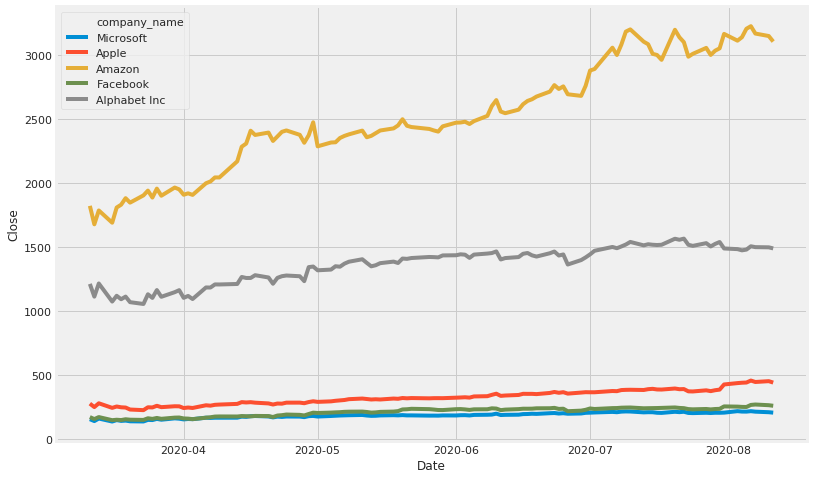

In [ ]:
fig2 = plt.gcf()
fig2.set_size_inches(12, 8)
sns.lineplot(x=df.index, y="Close",
              hue="company_name",
              data=df)

**Besides from closing price,Number of shares of a security traded between its daily open and close price faced with a decrease for all companies. In addition, volatile trends show some jumps, especially at the begining of August for all companies.The reason is that investors behave timidily because of the shock of the global pandemic**


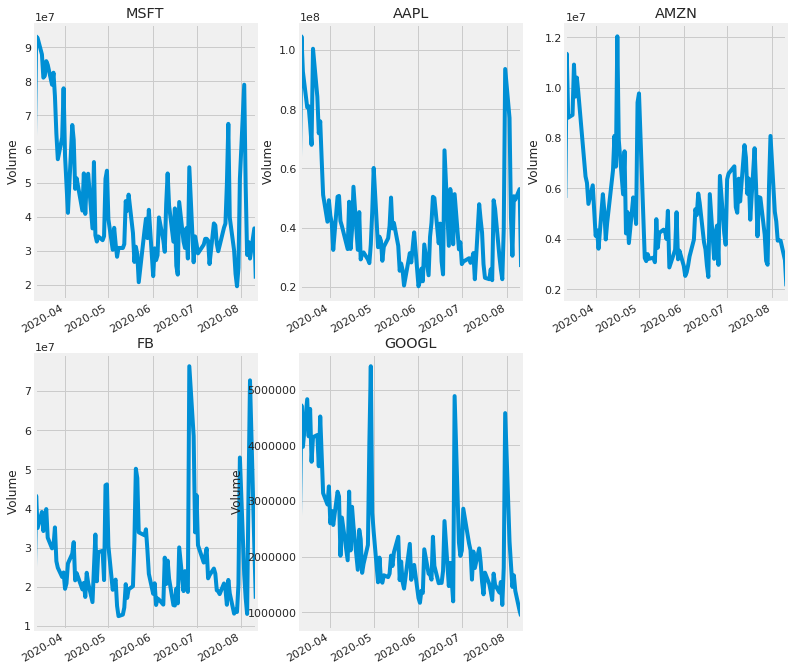

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

<center>
    <h2>
 Daily Return Of The Stock On Average
    </h2>
    </center>

For checking the daily return of the stock on average, moving average for 10,20 and 50 days were created.

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Constantly updated adjusted close prices are shown below.

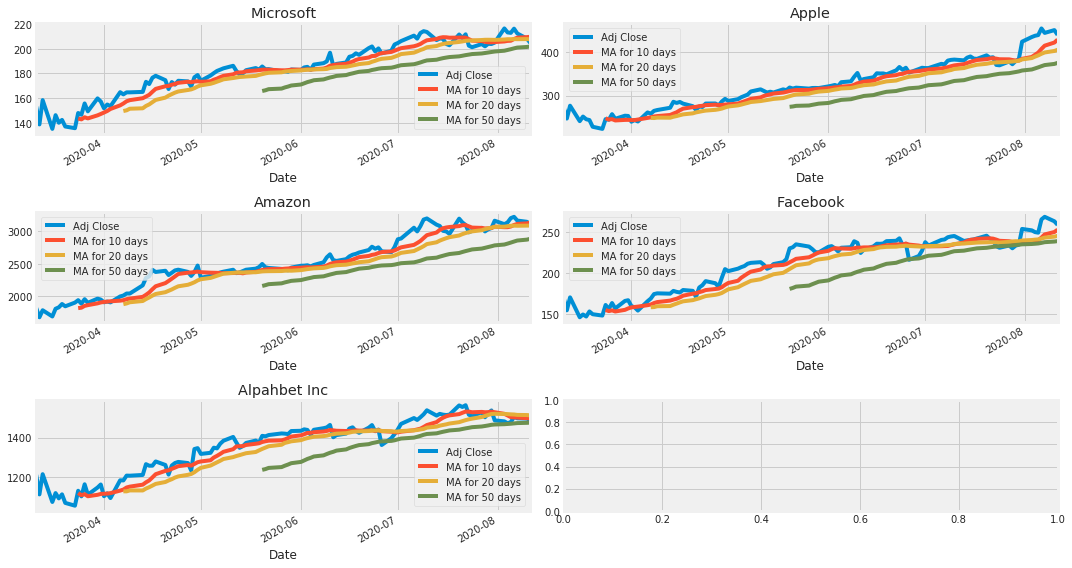

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Microsoft')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Apple')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Amazon')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Facebook')

GOOGL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Alpahbet Inc')


fig.tight_layout()

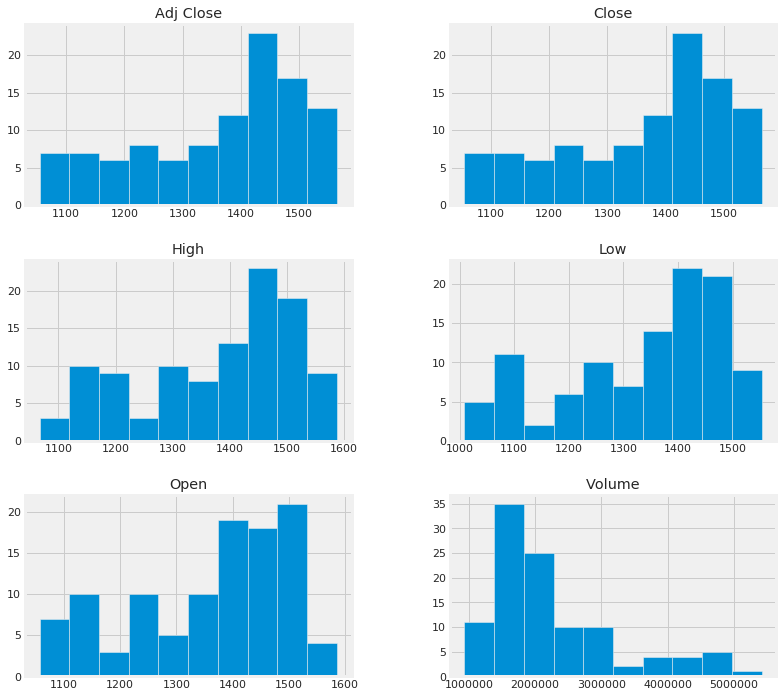

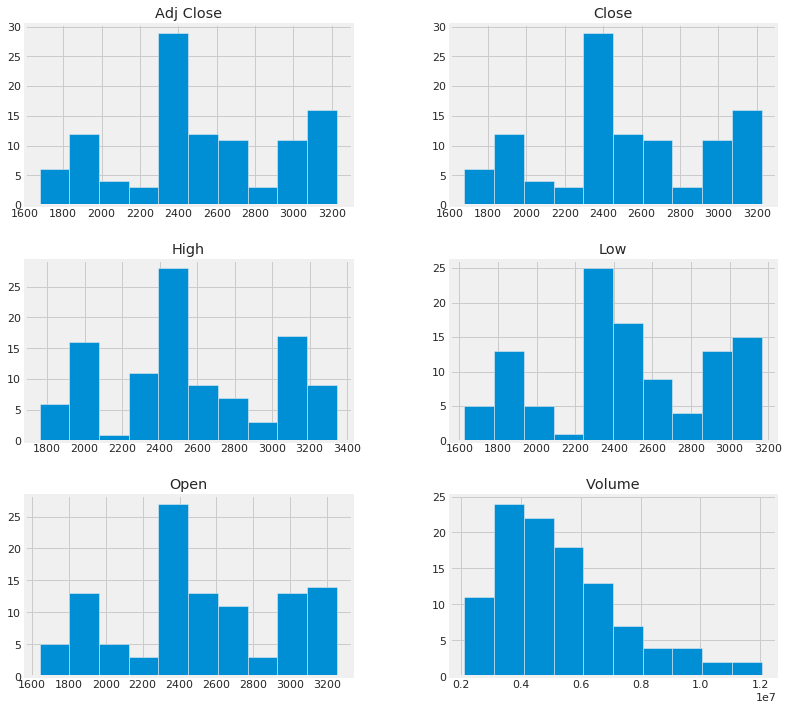

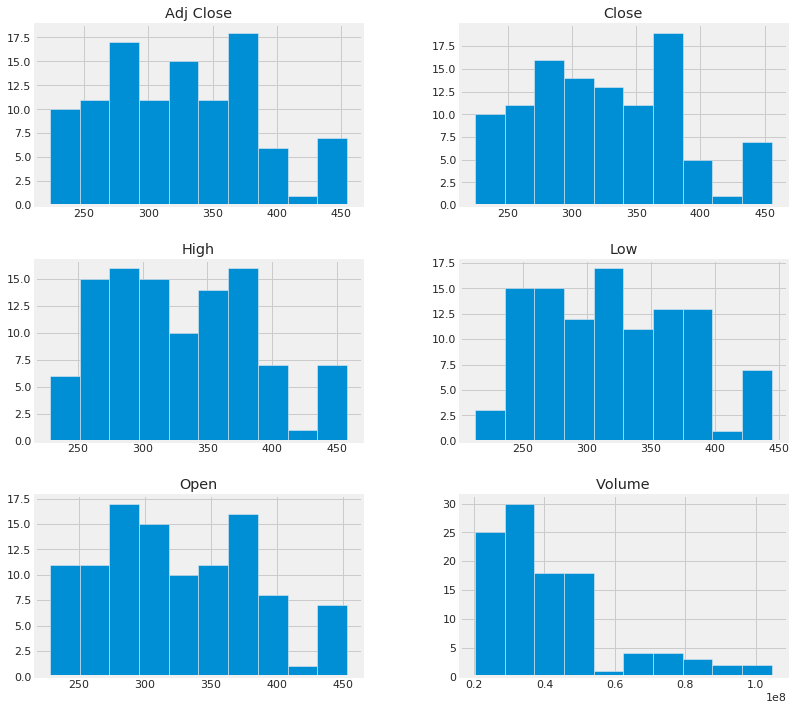

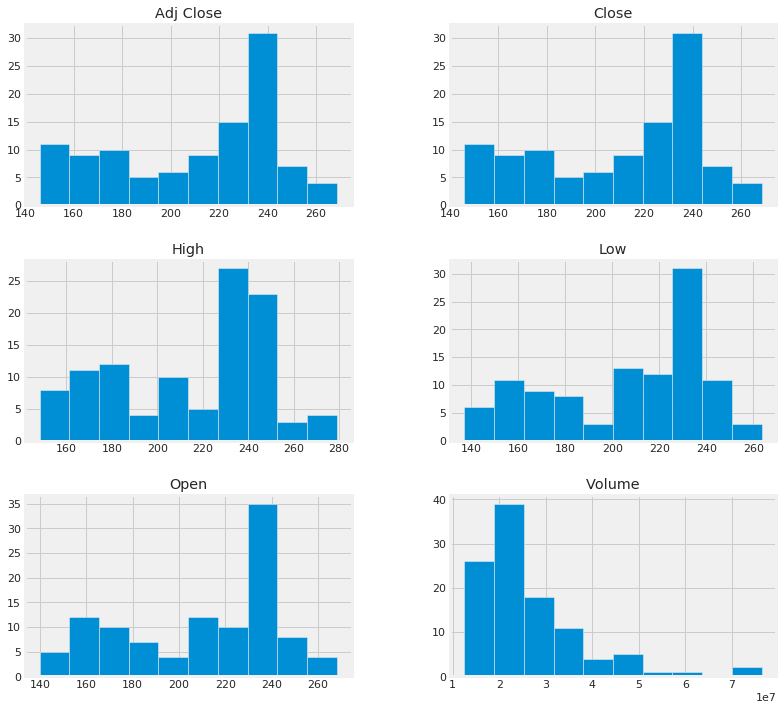

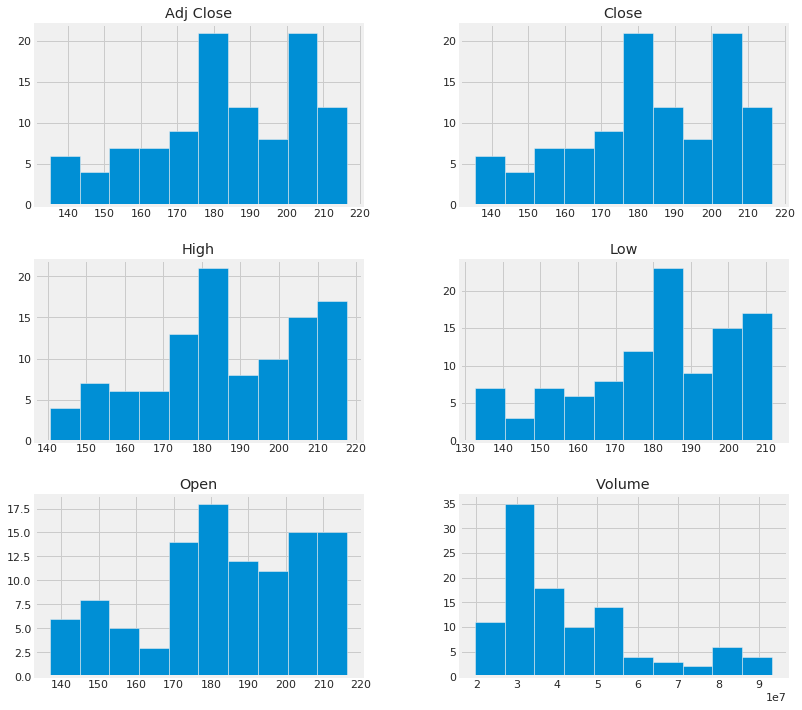

In [ ]:
df.groupby("company_name").hist(figsize=(12, 12));

<center>
    <h2>
  Moving Average of Stocks
    </h2>
    </center>

**Daily Return of the stocks,i.e percentage change of adjusted close price daily flactuates around zero over the time-period. Flactuation height is bigger at the begining of pandemic,then it decreases for all companies. However, Amazon and Facebook's change in adjusted prices are move dynamic after June**

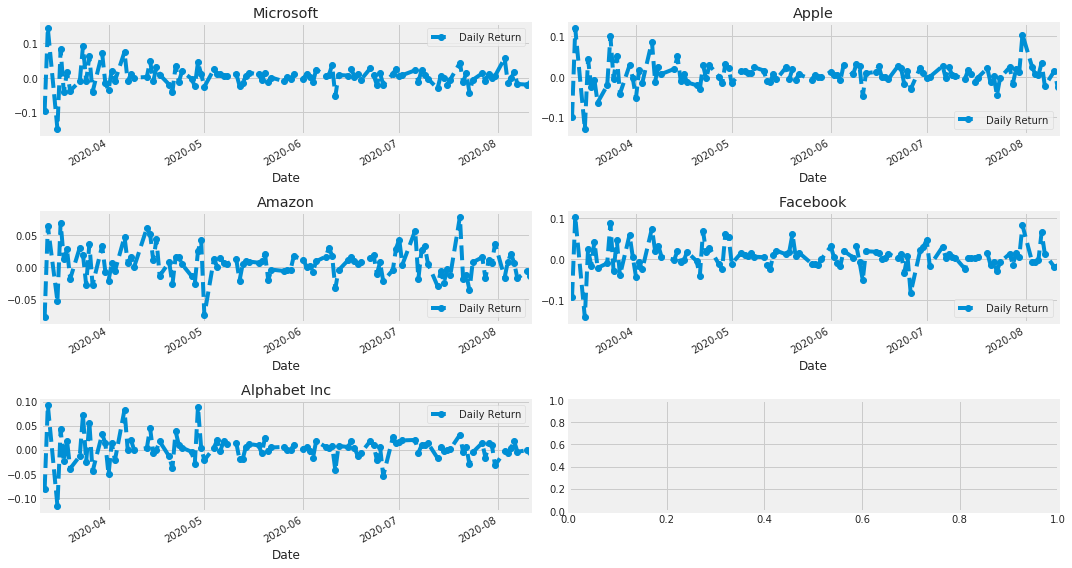

In [ ]:

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

MSFT['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Microsoft')

AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Apple')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Amazon')

FB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Facebook')

GOOGL['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Alphabet Inc')

fig.tight_layout()

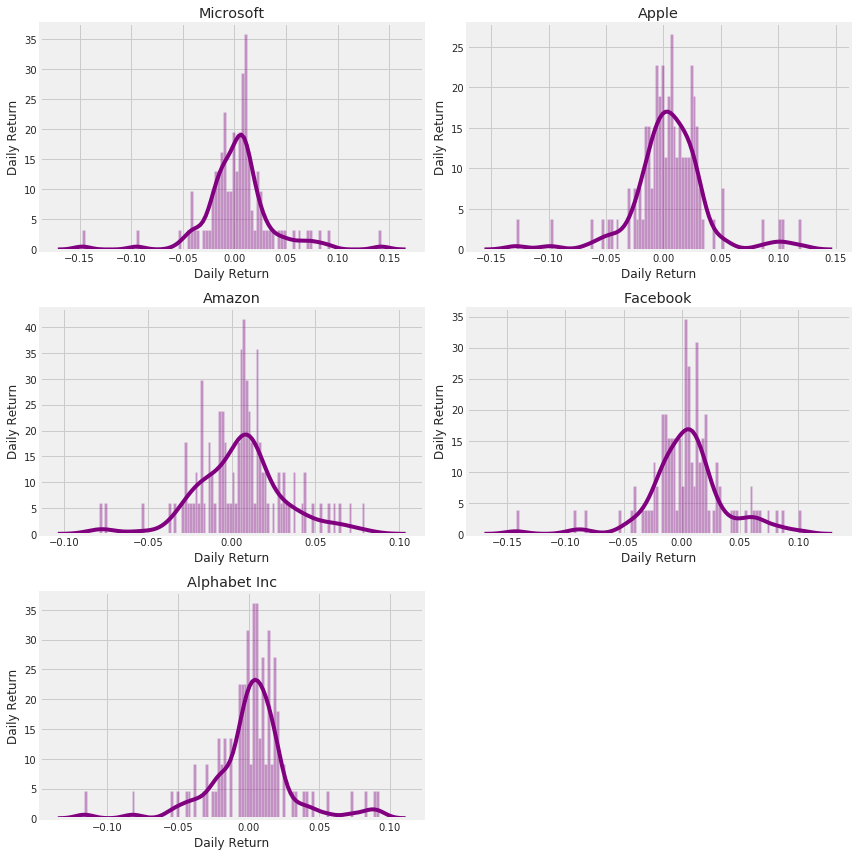

In [ ]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'], bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    plt.tight_layout()

<center>
    <h2>
 Correlation Between Stocks?
    </h2>
    </center>

In [ ]:
closing_df = DataReader(tech_list, 'yahoo', start='2020-03-11', end=datetime.now())['Adj Close']
closing_df.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2020-03-11,153.203323,274.192047,1820.859985,170.240005,1210.900024
2020-03-12,138.673782,247.114319,1676.609985,154.470001,1111.550049
2020-03-13,158.388870,276.720642,1785.000000,170.279999,1214.270020
2020-03-16,135.043884,241.121384,1689.150024,146.009995,1073.000000
2020-03-17,146.162933,251.723511,1807.839966,149.419998,1118.060059


In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2020-03-11,NaN,NaN,NaN,NaN,NaN
2020-03-12,-0.094838,-0.098755,-0.079221,-0.092634,-0.082046
2020-03-13,0.142169,0.119808,0.064648,0.102350,0.092411
2020-03-16,-0.147390,-0.128647,-0.053697,-0.142530,-0.116342
2020-03-17,0.082337,0.043970,0.070266,0.023355,0.041994


**Adjusted Price Correlation of Companies**

Visualization suggests that adjusted prices are moving together. Positive relationships can be seen from the scatterplots and map plot

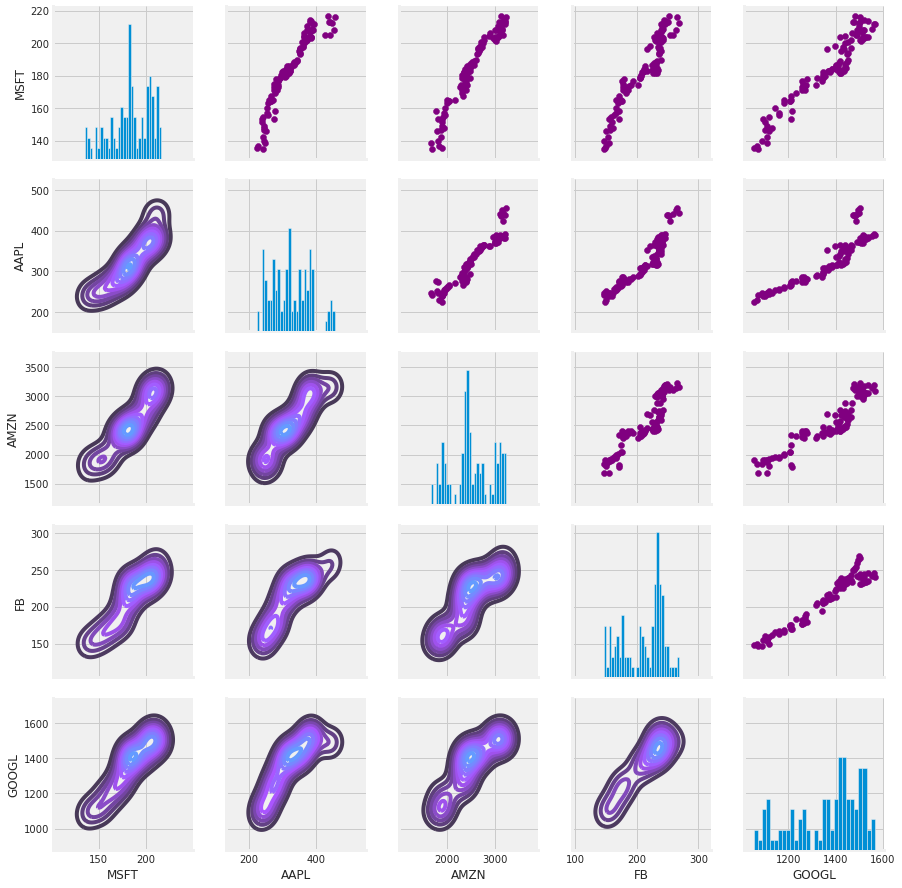

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

**Daily Return Corroletions**

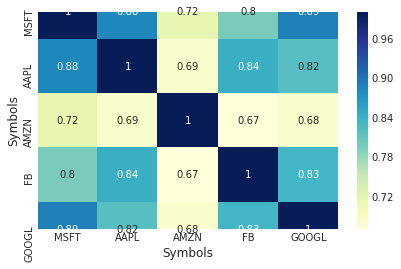

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")

<center>
    <h2>
 Risk of Investing In a Particular Stock
    </h2>
    </center>

Visualization suggests that Amazon is the least risky and has the most expected return among the companies. On the other hand, Microsoft, Facebook and Apple are much more riskier but the risk level is too low.(3.5%)

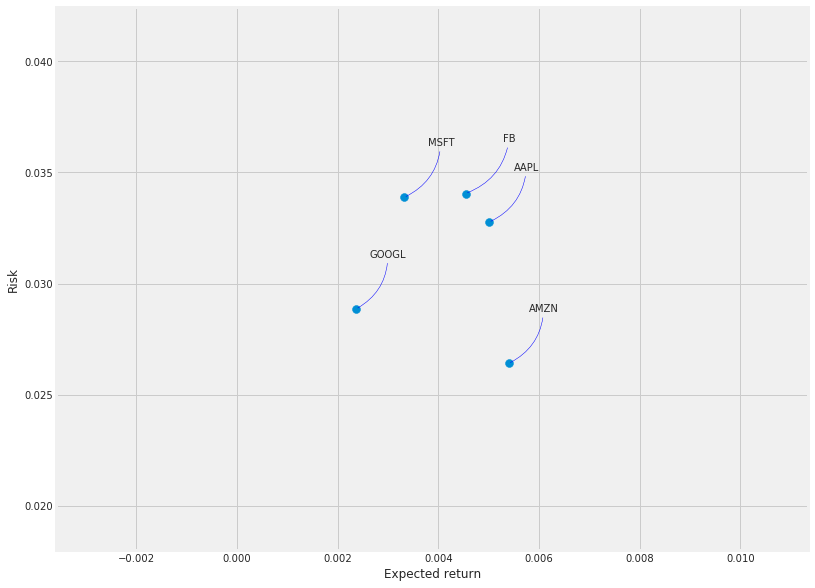

In [ ]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Stock Price Behavior Prediction Using Long Short-Term Memory

## Definition 

The Long Short—Term Memory (LSTM) is a specific RNN architecture whose special architecture allows them to represent long term dependencies.








In [ ]:
df = DataReader('MSFT', data_source='yahoo', start='2009-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,20.400000,19.370001,19.530001,20.330000,50084000.0,15.549164
2009-01-05,20.670000,20.059999,20.200001,20.520000,61475200.0,15.694486
2009-01-06,21.000000,20.610001,20.750000,20.760000,58083400.0,15.878043
2009-01-07,20.290001,19.480000,20.190001,19.510000,72709900.0,14.921995
2009-01-08,20.190001,19.549999,19.629999,20.120001,70255400.0,15.388541
...,...,...,...,...,...,...
2020-08-07,215.699997,210.929993,214.850006,212.479996,27789600.0,212.479996
2020-08-10,211.880005,206.350006,211.669998,208.250000,36716500.0,208.250000
2020-08-11,207.649994,203.139999,207.160004,203.380005,36446500.0,203.380005


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2924 entries, 2009-01-02 to 2020-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2924 non-null   float64
 1   Low        2924 non-null   float64
 2   Open       2924 non-null   float64
 3   Close      2924 non-null   float64
 4   Volume     2924 non-null   float64
 5   Adj Close  2924 non-null   float64
dtypes: float64(6)
memory usage: 159.9 KB


In [ ]:
df["Date"] = df.index
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'], inplace=True)

In [ ]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

2339
585


In [ ]:
look_back = 15

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [ ]:
model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
history = model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
117/117 [==============================] - 1s 5ms/step - loss: 2028.5830
Epoch 2/25
117/117 [==============================] - 1s 5ms/step - loss: 1047.7380
Epoch 3/25
117/117 [==============================] - 1s 5ms/step - loss: 52.1275
Epoch 4/25
117/117 [==============================] - 1s 5ms/step - loss: 6.9842
Epoch 5/25
117/117 [==============================] - 1s 5ms/step - loss: 4.3936
Epoch 6/25
117/117 [==============================] - 1s 5ms/step - loss: 2.7715
Epoch 7/25
117/117 [==============================] - 1s 5ms/step - loss: 2.0035
Epoch 8/25
117/117 [==============================] - 1s 5ms/step - loss: 1.7511
Epoch 9/25
117/117 [==============================] - 1s 5ms/step - loss: 1.6470
Epoch 10/25
117/117 [==============================] - 1s 5ms/step - loss: 1.5114
Epoch 11/25
117/117 [==============================] - 1s 5ms/step - loss: 1.5146
Epoch 12/25
117/117 [==============================] - 1s 5ms/step - loss: 1.3110
Epoch 13/25
117/11

In [ ]:
prediction = model.predict(test_generator)
rmse = np.sqrt(np.mean(((prediction - close_test) ** 2)))
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

In [ ]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Train'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Actual Values'
)
layout = go.Layout(
    title = "Microsoft Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

## Loss and RMSE For Robustness Check

Text(0.5, 1.0, 'Loss of the model')

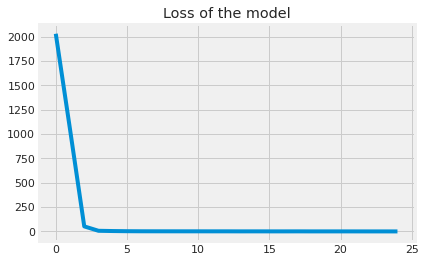

In [ ]:
l = history.history["loss"]
plt.plot(l)
plt.title('Loss of the model')

In [ ]:
print(rmse)

45.750754689195446




*   **Forecasting the Next Month**




In [ ]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)
forecast

array([208.80000305, 214.10479736, 214.88497925, 214.67573547,
       215.89785767, 216.44229126, 221.66743469, 226.42683411,
       224.70007324, 225.71403503, 226.04969788, 222.45980835,
       218.40904236, 217.99295044, 221.47427368, 223.4488678 ,
       226.97543335, 227.36701965, 227.78875732, 228.84593201,
       231.40455627, 236.36175537, 238.3419342 , 237.76132202,
       238.45350647, 237.24229431, 233.60992432, 231.10751343,
       232.417099  , 235.44810486, 238.1395874 ])

In [ ]:

trace2 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode = 'lines',
    name = 'Forecast'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Stock Price MSFT'
)
layout = go.Layout(
    title = "Microsoft Stock Price Forecast",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[ trace2, trace3], layout=layout)
fig.show()

# Discussion and Conclusion

Covid-19 Impacts on stock market show its effect on daily basis but we cannot see something different in the long run. Most important effect is the decrease in the volume of the companies. In other words, number of shares that changed hands during the day has decreased over the period due to concerns of investors. This exogenous shock can affect people's behavior to behave very chary. As I said, climb of the close prices of top 5 S&P 500 companies are still continuing. Amazon looks like the most profitable company to invest. Another interesting thing is the correlation of the stock prices of companies. All of them have positive relationships.

When we look at the behavior forecasr using neural network, results of the model gives us an idea. Forecast suggests an sharp increase in closing price of Microsoft for next month with two big decrease which are on August 25 and September 9.

However, we cannot be fully sure about something. Stock prices are highly changeable and connected to other factors such as politics.In short, impact of historical data in stock price trends is too singular. Although LSTM provides more accurate results than other models, it does not able to fully and accurately forecast the price on a given day. Next thing to do can be the adding of stock-related news with basic information to enhance stability and more accuracy.
